<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/GloVe%3A%20Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 01 Jan, 2022
# Objective: Experimenting with GloVe

# A Closer Look at Word Embeddings


To understand theory behind GloVe, see [this link](https://github.com/harnalashok/deeplearning-sequences/blob/main/tf_idf_%26_GloVe.ipynb) in my github repo.

We have very briefly covered how word embeddings (also known as word vectors) are used in the tutorials. In this appendix we'll have a closer look at these embeddings and find some (hopefully) interesting results.

Embeddings transform a one-hot encoded vector (a vector that is 0 in elements except one, which is 1) into a much smaller dimension vector of real numbers. The one-hot encoded vector is also known as a *sparse vector*, whilst the real valued vector is known as a *dense vector*. 

The key concept in these word embeddings is that words that appear in similar _contexts_ appear nearby in the vector space, i.e. the Euclidean distance between these two word vectors is small. By context here, we mean the surrounding words. For example in the sentences "I purchased some items at the shop" and "I purchased some items at the store" the words 'shop' and 'store' appear in the same context and thus should be close together in vector space.

You may have also heard about *word2vec*. *word2vec* is an algorithm (actually a bunch of algorithms) that calculates word vectors from a corpus. In this appendix we use *GloVe* vectors, *GloVe* being another algorithm to calculate word vectors. If you want to know how *word2vec* works, check out a two part series [here](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/) and [here](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/), and if you want to find out more about *GloVe*, check the website [here](https://nlp.stanford.edu/projects/glove/).

In PyTorch, we use word vectors with the `nn.Embedding` layer, which takes a _**[sentence length, batch size]**_ tensor and transforms it into a _**[sentence length, batch size, embedding dimensions]**_ tensor.

In tutorial 2 onwards, we also used pre-trained word embeddings (specifically the GloVe vectors) provided by TorchText. These embeddings have been trained on a gigantic corpus. We can use these pre-trained vectors within any of our models, with the idea that as they have already learned the context of each word they will give us a better starting point for our word vectors. This usually leads to faster training time and/or improved accuracy.

In this appendix we won't be training any models, instead we'll be looking at the word embeddings and finding a few interesting things about them.

A lot of the code from the first half of this appendix is taken from [here](https://github.com/spro/practical-pytorch/blob/master/glove-word-vectors/glove-word-vectors.ipynb). For more information about word embeddings, go [here](https://monkeylearn.com/blog/word-embeddings-transform-text-numbers/). 

## Loading the GloVe vectors

First, we'll load the GloVe vectors. The `name` field specifies what the vectors have been trained on, here the `6B` means a corpus of 6 billion words. The `dim` argument specifies the dimensionality of the word vectors. GloVe vectors are available in 50, 100, 200 and 300 dimensions. There is also a `42B` and `840B` glove vectors, however they are only available at 300 dimensions.

In [1]:
# 1.0 Import libraries
import torch
import torchtext.vocab


In [ ]:
# 1.1 Get a 'glove' object
glove = torchtext.vocab.GloVe(
                              name = '6B',
                              dim = 100
                              )

## Word vectors
Examine 'glove' object

There are 400,000 unique words in the GloVe vocabulary. These are the most common words found in the corpus the vectors were trained on. **In these set of GloVe vectors, every single word is lower-case only.**

`glove.vectors` is the actual tensor containing the values of the embeddings.

In [3]:
# 2.0 One attribute of 'glove' object is 'vectors'
#      that gives us the word-embedding matrix:
glove.vectors.shape  # 4 lakh tokens

torch.Size([400000, 100])

In [ ]:
# 2.1 Get the word-vec of first two words:

glove.vectors[:2,:]

We can see what word is associated with each row of vectors by checking the `itos` (int to string) list. 

Below implies that row 0 is the vector associated with the word 'the', row 1 for ',' (comma), row 2 for '.' (period), etc.

In [ ]:
# 2.2 But what are first two words:
#     itos: Integer-to-string

glove.itos[:2]

In [ ]:
# 2.3 And how many words are there in glove vocab?
#     It is also clear from vector shape (above)

print(f'There are {len(glove.itos)} words in the vocabulary')

## Word index

We can also use the `stoi` (string to int) dictionary, in which we input a word and receive the associated integer/index. If you try get the index of a word that is not in the vocabulary, you receive an error.

In [ ]:
# 3.0 Dictionary of word:index
#     stoi: String-to-index

glove.stoi

In [ ]:
# 3.1 And get the word-index for 'the':
#     It is the first word in the dictionary:

glove.stoi['the']

We can get the vector of a word by first getting the integer associated with it and then indexing into the word embedding tensor with that index.

In [ ]:
# 3.2 Get vector for 'the':

glove.vectors[glove.stoi['the'],:]

We'll be doing this a lot, so we'll create a function that takes in word embeddings and a word then returns the associated vector. It'll also throw an error if the word doesn't exist in the vocabulary.

### Learning 'assert'

Python has built-in *assert* statement to use *assertion condition* in the program. *assert* statement has a *condition* or expression which is supposed to be **always true**. If the condition is false, assert halts the program and gives an *AssertionError*.

In [9]:
# 4.0 Does 'it' exists in glove?
#     Check the dictionary:
#     Syntax: assert <condition>,<error message>

assert 'it' in glove.stoi

In [ ]:
# 4.1 This will give an error:
#     Word 'txte' is not in dict:

assert 'txte' in glove.stoi

In [ ]:
# 4.2 You can print your own message, if error:

assert 'txte' in glove.itos, f' txte is not in vocab ' 

We'll be doing word to vector conversion a lot, so we'll create a function that takes in word embeddings object (*'glove'*) and a *word* then returns the associated vector. It'll also throw an error if the word doesn't exist in the vocabulary.

In [12]:
# 5.0 Define a function to return vector given a word:

def get_vector(embeddings, word):
    assert word in embeddings.stoi, f'*{word}* is not in the vocab!'
    return embeddings.vectors[embeddings.stoi[word], :]

As before, we use a word to get the associated vector.

In [ ]:
# 5.1 This returns a vector
get_vector(glove, 'the')

In [ ]:
# 5.2 This gives an assertion error:

get_vector(glove, 'theee')

## Similar Contexts

Now to start looking at the context of different words. 

If we want to find the words similar to a certain input word, we first find the vector of this input word, then we scan through our vocabulary calculating the distance between the vector of each word and our input word vector. We then sort these from closest to furthest away.

The function below returns the closest 10 words to an input word vector:

### distance function in pytorch

In [ ]:
# 6.0 Get distance between two vectors using torch.dist():
#     Ouput is a tensor

torch.dist(
            get_vector(glove, 'apple'),  # [0.325, 0.467]
            get_vector(glove, 'mango')   # [0.456, 0.774]
          )

In [ ]:
# 6.1 This outputs a scalar value:
# Ref: https://pytorch.org/docs/stable/generated/torch.Tensor.item.html

torch.dist(
            get_vector(glove, 'apple'),
            get_vector(glove, 'mango')
           ).item()

In [17]:
# 6.2
def closest_words(embeddings, vector, n = 10):
    
    # 6.2.1 Given a word, finds its distance from 
    #       every other word. Get all tuples of (word, distance):

    distances = [
                  (word, torch.dist(
                                     vector,
                                     get_vector(embeddings, word)
                                     ).item()
                  )
                 for word in embeddings.itos
                ]
    
    # 6.2.2 Sort by IInd element and return all the tuples
    #         Sorting is in ascending order:
    
    return sorted(distances, key = lambda w: w[1])[:n]

Let's try it out with 'korea'. The closest word is the word 'korea' itself (not very interesting), however all of the words are related in some way. Pyongyang is the capital of North Korea, DPRK is the official name of North Korea, etc.

Interestingly, we also get 'Japan' and 'China',  implies that Korea, Japan and China are frequently talked about together in similar contexts. This makes sense as they are geographically situated near each other. 

In [ ]:
# 6.3
word_vector = get_vector(glove, 'korea')

closest_words(glove, word_vector)

Looking at another country, India, we also get nearby countries: Thailand, Malaysia and Sri Lanka (as two separate words). Australia is relatively close to India (geographically), but Thailand and Malaysia are closer. So why is Australia closer to India in vector space? This is most probably due to India and Australia appearing in the context of [cricket](https://en.wikipedia.org/wiki/Cricket) matches together.

In [ ]:
# 6.4
word_vector = get_vector(glove, 'india')

closest_words(glove, word_vector)

We'll also create another function that will nicely print out the tuples returned by our `closest_words` function.

In [20]:
# 6.5
def print_tuples(tuples):
    for w, d in tuples:
        print(f'({d:02.04f}) {w}') 

A final word to look at, 'sports'. As we can see, the closest words are most of the sports themselves. 

In [ ]:
# 6.6
word_vector = get_vector(glove, 'sports')

print_tuples(closest_words(glove, word_vector))

## Analogies

Another property of word embeddings is that they can be operated on just as any standard vector and give interesting results.

We'll show an example of this first, and then explain it:

In [22]:
# 7.0 Vectors for 'king', 'man' and 'woman'
king =  get_vector(glove, 'king')
man  =  get_vector(glove, 'man')
woman = get_vector(glove, 'woman')

# 7.1 Perform vector maths:
nc = king- man + woman

In [ ]:
# 7.2 Word closest to 'nc'
cl_words = closest_words(glove,nc,5)

# 7.3 Frpm 'woords', 
#      filter out words already
#        in the list ['king','man','woman']

[(word, dist) for (word, dist) in cl_words if word not in ['king','man','woman']]

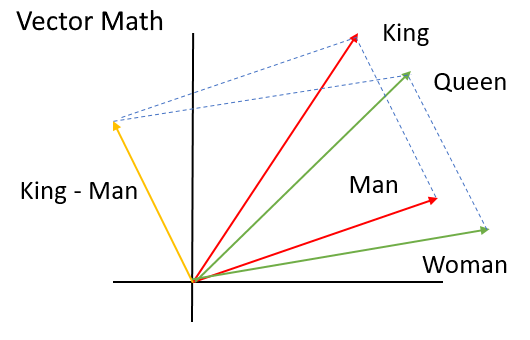

In [24]:
# 8.0 We now define a formal function:
def analogy(embeddings, word1, word2, word3, n=5):
    
    # 8.0.1 get vectors for each word
    word1_vector = get_vector(embeddings, word1)
    word2_vector = get_vector(embeddings, word2)
    word3_vector = get_vector(embeddings, word3)
    
    # 8.0.2 calculate analogy vector
    analogy_vector = word2_vector - word1_vector + word3_vector
    
    # 8.0.3 find closest words to analogy vector
    candidate_words = closest_words(embeddings, analogy_vector, n+3)
    
    # 8.0.4 filter out words already in analogy
    candidate_words = [(word, dist) for (word, dist) in candidate_words 
                       if word not in [word1, word2, word3]][:n]
    
    print(f'{word1} is to {word2} as {word3} is to...')
    
    return candidate_words

In [ ]:
# 8.1 king - man + woman = Royality(woman)
#     Rolyality = king - man
print_tuples(analogy(glove, 'man', 'king', 'woman'))

This is the canonical example which shows off this property of word embeddings. So why does it work? Why does the vector of 'woman' added to the vector of 'king' minus the vector of 'man' give us 'queen'?

If we think about it, the vector calculated from 'king' minus 'man' gives us a "royalty vector". This is the vector associated with traveling from a man to his royal counterpart, a king. If we add this "royality vector" to 'woman', this should travel to her royal equivalent, which is a queen!

We can do this with other analogies too. For example, this gets an "acting career vector":

In [ ]:
# 8.2  actor - man + woman = KnowsActing(woman)
#      KnowsActing = actor -man

print_tuples(analogy(glove, 'man', 'actor', 'woman'))

For a "baby animal vector":

In [ ]:
# 8.3 kitten - cat + dog = child(dog)
#     child = kitten - cat

print_tuples(analogy(glove, 'cat', 'kitten', 'dog'))

A "capital city vector":

In [ ]:
# 8.4 paris - france + england = capital(england)
#     capital = paris - france

print_tuples(analogy(glove, 'france', 'paris', 'england'))

A "musician's genre vector":

In [ ]:
# 8.5
print_tuples(analogy(glove, 'elvis', 'rock', 'eminem'))

And an "ingredient vector":

In [ ]:
# 8.6 barley - beer + wine
print_tuples(analogy(glove, 'beer', 'barley', 'wine'))

In [ ]:
########## I am done ###########3
# All the code below works

## Correcting Spelling Mistakes

Another interesting property of word embeddings is that they can actually be used to correct spelling mistakes! 

We'll put their findings into code and briefly explain them, but to read more about this, check out the [original thread](http://forums.fast.ai/t/nlp-any-libraries-dictionaries-out-there-for-fixing-common-spelling-errors/16411) and the associated [write-up](https://blog.usejournal.com/a-simple-spell-checker-built-from-word-vectors-9f28452b6f26).

First, we need to load up the much larger vocabulary GloVe vectors, this is due to the spelling mistakes not appearing in the smaller vocabulary. 

**Note**: these vectors are very large (~2GB), so watch out if you have a limited internet connection.

In [ ]:
glove = torchtext.vocab.GloVe(name = '840B', dim = 300)

Checking the vocabulary size of these embeddings, we can see we now have over 2 million unique words in our vocabulary!

In [ ]:
glove.vectors.shape

As the vectors were trained with a much larger vocabulary on a larger corpus of text, the words that appear are a little different. Notice how the words 'north', 'south', 'pyongyang' and 'dprk' no longer appear in the most closest words to 'korea'.

In [ ]:
word_vector = get_vector(glove, 'korea')

print_tuples(closest_words(glove, word_vector))

Our first step to correcting spelling mistakes is looking at the vector for a misspelling of the word 'reliable'.

In [ ]:
word_vector = get_vector(glove, 'relieable')

print_tuples(closest_words(glove, word_vector))

Notice how the correct spelling, "reliable", does not appear in the top 10 closest words. Surely the misspellings of a word should appear next to the correct spelling of the word as they appear in the same context, right? 

The hypothesis is that misspellings of words are all equally shifted away from their correct spelling. This is because articles of text that contain spelling mistakes are usually written in an informal manner where correct spelling doesn't matter as much (such as tweets/blog posts), thus spelling errors will appear together as they appear in context of informal articles.

Similar to how we created analogies before, we can create a "correct spelling" vector. This time, instead of using a single example to create our vector, we'll use the average of multiple examples. This will hopefully give better accuracy!

We first create a vector for the correct spelling, 'reliable', then calculate the difference between the "reliable vector" and each of the 8 misspellings of 'reliable'. As we are going to concatenate these 8 misspelling tensors together we need to unsqueeze a "batch" dimension to them.

In [ ]:
reliable_vector = get_vector(glove, 'reliable')

reliable_misspellings = ['relieable', 'relyable', 'realible', 'realiable', 
                         'relable', 'relaible', 'reliabe', 'relaiable']

diff_reliable = [(reliable_vector - get_vector(glove, s)).unsqueeze(0) 
                 for s in reliable_misspellings]

We take the average of these 8 'difference from reliable' vectors to get our "misspelling vector".

In [ ]:
misspelling_vector = torch.cat(diff_reliable, dim = 0).mean(dim = 0)

We can now correct other spelling mistakes using this "misspelling vector" by finding the closest words to the sum of the vector of a misspelled word and the "misspelling vector".

For a misspelling of "because":

In [ ]:
word_vector = get_vector(glove, 'becuase')

print_tuples(closest_words(glove, word_vector + misspelling_vector))

For a misspelling of "definitely":

In [ ]:
word_vector = get_vector(glove, 'defintiely')

print_tuples(closest_words(glove, word_vector + misspelling_vector))

For a misspelling of "consistent":

In [ ]:
word_vector = get_vector(glove, 'consistant')

print_tuples(closest_words(glove, word_vector + misspelling_vector))

For a misspelling of "package":

In [ ]:
word_vector = get_vector(glove, 'pakage')

print_tuples(closest_words(glove, word_vector + misspelling_vector))

For a more in-depth look at this, check out the [write-up](https://blog.usejournal.com/a-simple-spell-checker-built-from-word-vectors-9f28452b6f26).